## Parsing unity VR log file using functions in the locproc module

In [15]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [ ]:
# if you want to import files from the parent directory, please add the directory to the path:
#import sys, os, inspect
#currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
#parentdir = os.path.dirname(currentdir)
#sys.path.insert(0, parentdir)
#print(sys.path)

In [2]:
from unityvr.preproc import logproc
from unityvr.viz import viz

In [3]:
dirName = "../sample/"
fileName = "Log_2021-05-13_22-25-48_SS96_x_7f_f01_EB_panA1_t01.json"

dat = logproc.openUnityLog(dirName, fileName)

for i in range(2):
    print(dat[i]['frame'])
    print(json.dumps(dat[i], sort_keys=True, indent=4))

273.0
{
    "frame": 273.0,
    "frameAfterSplash": 273.0,
    "headerNotes": "~expid:SS96-x-7f_panA1 ~experiment:projectors on, panorama test, 144 Hz frame rate, SS96 > GCaMP7f in VK5 ~genotype:SS96-x-7f ~flyid:f01 ~sex:f ~age:4-6d ~notes:EB imaging ~trial:01                                                                             ",
    "timeSecs": 1.9777061939239502,
    "timeSecsAfterSplash": 1.9777061939239502
}
273.0
{
    "frame": 273.0,
    "frameAfterSplash": 273.0,
    "sessionParameters": [
        "timeoutSecs: 487",
        "backgroundCylinderTexture: C:\\Users\\labadmin\\Documents\\unityVR\\assets\\panoramas\\simpleFeatureTest\\A1_darkSpot.png"
    ],
    "timeSecs": 1.9777061939239502,
    "timeSecsAfterSplash": 1.9777061939239502
}


### Construct data object from log file
#### Extract header info

In [6]:
print(dat[0]['headerNotes'])
logproc.makeMetaDict(dat, fileName)

~expid:SS96-x-7f_panA1 ~experiment:projectors on, panorama test, 144 Hz frame rate, SS96 > GCaMP7f in VK5 ~genotype:SS96-x-7f ~flyid:f01 ~sex:f ~age:4-6d ~notes:EB imaging ~trial:01                                                                             


{'expid': 'SS96-x-7f_panA1',
 'experiment': 'projectors on, panorama test, 144 Hz frame rate, SS96 > GCaMP7f in VK5',
 'genotype': 'SS96-x-7f',
 'sex': 'f',
 'flyid': 'f01',
 'trial': 'trial01',
 'date': '2021-05-13',
 'time': '22-25-48',
 'notes': 'EB imaging'}

#### Pull out object positions as pandas dataframe

In [7]:
objDf = logproc.objDfFromLog(dat)
objDf.head()

,name,collider,px,py,pz,rx,ry,rz,sx,sy,sz
0,BackgroundCylinder/default,NA,0.0,0.0,0.0,0.0,0.0,0.0,-5.8,5.8,1.95
1,Fly/FlyCamera3/FlyCamera3Screen,MeshCollider,3.229198,-2.346149,-3.0495,0.0,0.0,306.0,5.8,1.0,9.5
2,Fly/FlyCamera2/FlyCamera2Screen,MeshCollider,3.229198,2.34615,-3.0495,0.0,0.0,234.0,5.800001,1.0,9.5
3,Fly/FlyCamera1/FlyCamera1Screen,MeshCollider,-1.233444,3.79615,-3.0495,0.0,0.0,162.0,5.8,1.0,9.5
4,Fly/FlyCamera4/FlyCamera4Screen,MeshCollider,-1.233444,-3.796151,-3.0495,0.0,0.0,18.000004,5.800001,1.0,9.5


#### Pull out fly position as pandas dataframe
Position in VR

In [8]:
posDf, ftDf, tsDf = logproc.timeseriesDfFromLog(dat)

/Users/haberkernh/Documents/GitHub/unityvr/unityvr/preproc/logproc.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nidDf.imgfFilt[np.isfinite(nidDf.imgfsig)] = medfilt(nidDf.imgfsig[np.isfinite(nidDf.imgfsig)])


In [9]:
print(len(posDf))
posDf.head()

8248


,frame,time,dt,x,y,angle,dx,dy,dxattempt,dyattempt
0,293.0,0.000000,0.006938,0.000004,0.000075,0.128344,0.000004,0.000075,0.000004,0.000075
1,294.0,0.333333,0.333333,-0.000045,-0.000137,0.288939,-0.000049,-0.000212,-0.000049,-0.000212
2,295.0,0.336941,0.003608,0.000439,-0.000094,359.850067,0.000484,0.000045,0.000484,0.000045
3,296.0,0.340093,0.003152,0.000187,-0.000197,0.022188,-0.000252,-0.000102,-0.000252,-0.000102
4,297.0,0.341330,0.001236,0.000618,-0.000593,359.727020,0.000431,-0.000395,0.000431,-0.000395


Position based on Fictrac tracking

In [10]:
print(len(ftDf))
ftDf.head()

8411


,frame,ficTracTReadMs,ficTracTWriteMs,dx,dy,dz
0,293.0,0.0,0.0,-0.001049,-0.004042,0.003205
1,293.0,3.0,6601441.0,0.001140,0.005629,-0.000965
2,294.0,16.0,19804485.0,0.000132,-0.002370,0.001376
3,294.0,23.0,26406008.0,-0.001170,-0.002141,0.001427
4,295.0,36.0,39609172.0,0.000890,0.004981,-0.002221


Photodiode signal and frame rate dataframe

In [11]:
print(len(tsDf))
tsDf.head()

57266


,frame,time,dt,pdsig,imgfsig,pdFilt,pdThresh,imgfFilt,imgfThresh,framestart,counts,frameinterp,timeinterp
0,293.0,0.000000,0.006938,NaN,NaN,NaN,0,NaN,0,0,1,293.000,0.000000
1,294.0,0.333333,0.333333,0.011492,-0.002129,0.011492,0,-0.001805,0,1,1,294.000,0.333333
2,294.0,0.333333,0.333333,0.011817,-0.001805,0.011492,0,-0.001805,0,0,1,294.025,0.333423
3,294.0,0.333333,0.333333,0.010844,-0.001805,0.011817,0,-0.001805,0,0,1,294.050,0.333514
4,294.0,0.333333,0.333333,0.011817,-0.001805,0.011492,0,-0.001805,0,0,1,294.075,0.333604


In [12]:
framesDf = tsDf[['frame','time','dt']].drop_duplicates().reset_index(level=0)[['frame','time','dt']]

In [13]:
framesDf.head()

,frame,time,dt
0,293.0,0.000000,0.006938
1,294.0,0.333333,0.333333
2,295.0,0.336941,0.003608
3,296.0,0.340093,0.003152
4,297.0,0.341330,0.001236


Fictrac updates come in at a higher rate than the VR frame rate. Fictrac can also only run for a subset of the VR run time and therefore the number of frames in fictrac and vr dataframes may not match.

#### Frame rate

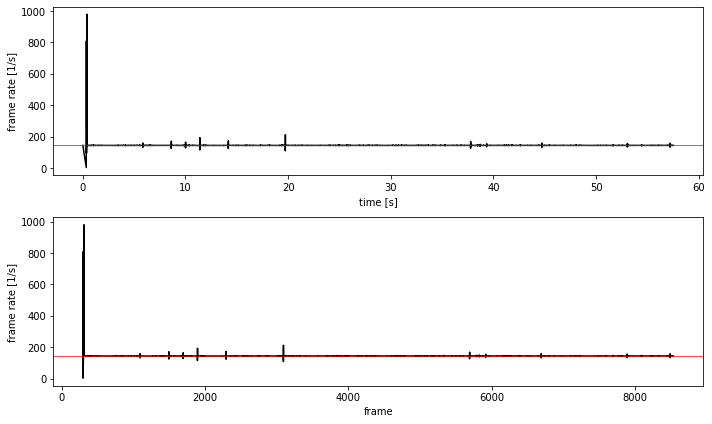

In [17]:
# set frame rate (see metadata)
forceframerate = 144
fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(framesDf.time, 1/framesDf.dt, 'k')
ax[1].plot(framesDf.frame, 1/framesDf.dt, 'k')
ax[0].set_xlabel('time [s]')
ax[1].set_xlabel('frame');
for i in range(2):
    ax[i].axhline(forceframerate,0,1,color='r', linewidth=0.7)
    ax[i].set_ylabel('frame rate [1/s]')
fig.tight_layout()

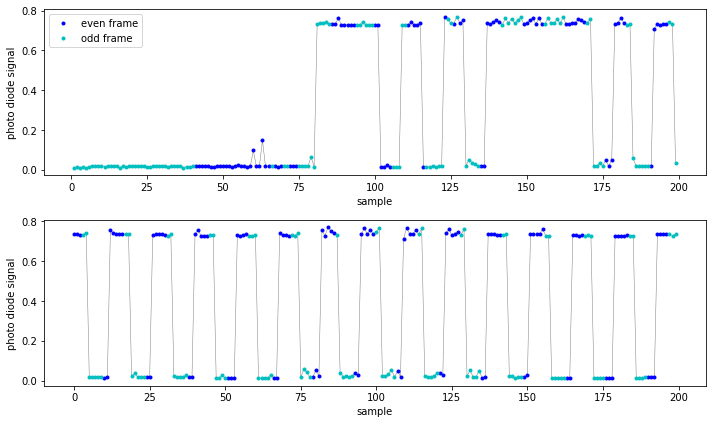

In [24]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
window = 200
for i, ts in enumerate([0,5000]):
    ax[i].plot(range(window),tsDf.pdsig[ts:ts+window],'-',color='grey',linewidth=0.5)
    
    even = tsDf[ts:ts+window][tsDf['frame'][ts:ts+window]%2==1]
    ax[i].plot(np.arange(window)[tsDf['frame'][ts:ts+window].values%2==1], even.pdsig, 'b.', label='even frame')
    
    odd = tsDf[ts:ts+window][tsDf['frame'][ts:ts+window]%2==0]
    ax[i].plot(np.arange(window)[tsDf['frame'][ts:ts+window].values%2==0], odd.pdsig, 'c.', label=
              'odd frame')
    
    ax[i].set_xlabel('time [s]')
    ax[i].set_ylabel('photo diode signal')
    ax[i].set_xlabel('sample');
ax[0].legend()
fig.tight_layout()

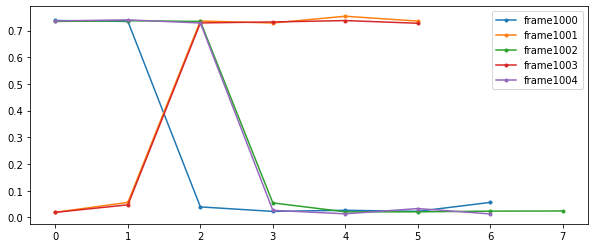

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
for f in range(1000,1005):
    sig = tsDf.query('frame == '+str(float(f)))
    ax.plot(range(len(sig.pdsig)), sig.pdsig, '.-',  label='frame{}'.format(f))
ax.legend()

Compute frame rate from photodiode signal

In [26]:
from scipy.signal import medfilt

tsDf["pdFilt"]  = tsDf.pdsig.values
tsDf.pdFilt[np.isfinite(tsDf.pdsig)] = medfilt(tsDf.pdsig[np.isfinite(tsDf.pdsig)])
tsDf["pdThresh"]  = 1*(np.asarray(tsDf.pdFilt>=0.2+np.nanmedian(tsDf.pdFilt.values)))

<ipython-input-26-69198de51145>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsDf.pdFilt[np.isfinite(tsDf.pdsig)] = medfilt(tsDf.pdsig[np.isfinite(tsDf.pdsig)])


Generate interpolated time

In [27]:
from scipy import interpolate

tsDf['framestart'] = np.hstack([0,1*np.diff(tsDf.time)>0])

tsDf['counts'] = 1
sampperframe = tsDf.groupby('frame').sum()[['time','dt','counts']].reset_index(level=0)
sampperframe['fs'] = sampperframe.counts/sampperframe.dt

frameStartIndx = np.hstack((0,np.where(tsDf.framestart)[0]))
frameStartIndx = np.hstack((frameStartIndx, frameStartIndx[-1]+sampperframe.counts.values[-1]-1))
frameIndx = tsDf.index.values

frameNums = tsDf.frame[frameStartIndx].values.astype('int')
frameNumsInterp = np.hstack((frameNums, frameNums[-1]+1))

timeAtFramestart = tsDf.time[frameStartIndx].values

#generate interpolated frames
frameinterp_f = interpolate.interp1d(frameStartIndx,frameNums)
tsDf['frameinterp'] = frameinterp_f(frameIndx)

timeinterp_f = interpolate.interp1d(frameStartIndx,timeAtFramestart)
tsDf['timeinterp'] = timeinterp_f(frameIndx)

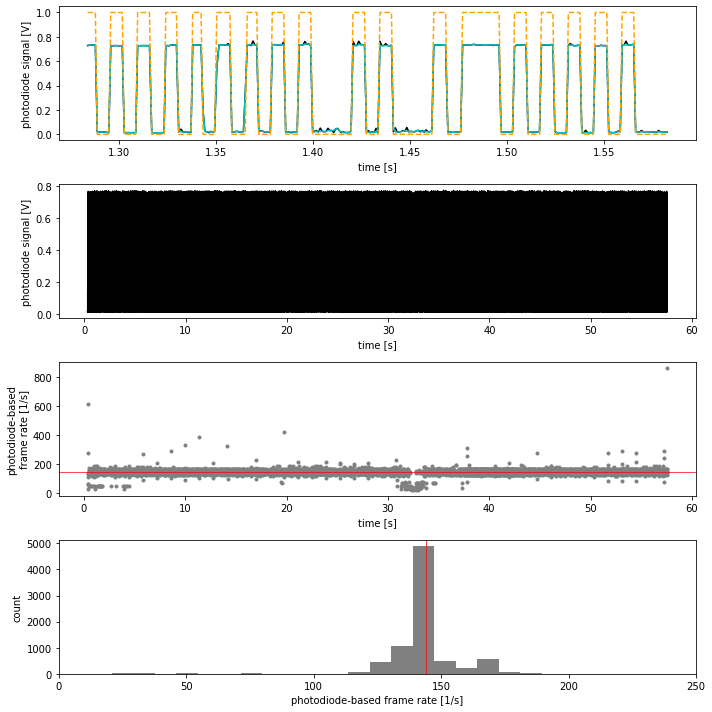

In [30]:
fig, ax = plt.subplots(4,1, figsize=(10,10))
ts = 1000
wind = 300
ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdsig[ts:ts+wind], 'k')
ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdFilt[ts:ts+wind], 'c')
ax[0].plot(tsDf.timeinterp[ts:ts+wind], tsDf.pdThresh[ts:ts+wind], '--',color='orange')
ax[0].set_ylabel('photodiode signal [V]')
ax[0].set_xlabel('time [s]')

pdChange = np.hstack((0,np.diff(tsDf.pdThresh)))
pdChangeT = tsDf.timeinterp.values[abs( pdChange )>0]

ax[1].plot(tsDf.timeinterp, tsDf.pdsig, 'k')
#ax[1].set_ylim(0,250)
ax[1].set_xlabel('time [s]')
ax[1].set_ylabel('photodiode signal [V]')

ax[2].plot(pdChangeT[1:], 1/np.diff(pdChangeT), '.', color='grey')
#ax[2].set_ylim(0,250)
ax[2].axhline(forceframerate,0,1,color='r', linewidth=0.7)
ax[2].set_xlabel('time [s]')
ax[2].set_ylabel('photodiode-based\nframe rate [1/s]')

ax[3].hist(1/np.diff(pdChangeT), 100, color='grey')
ax[3].set_xlim(0,250)
ax[3].axvline(forceframerate,0,1,color='r', linewidth=0.7)
ax[3].set_ylabel('count')
ax[3].set_xlabel('photodiode-based frame rate [1/s]')

fig.tight_layout()